# Perkenalan

## Our Members:
1. Aulia Firdatunnisa
2. Mubdi Marfiki Ikhsan
3. Wilda Amrul Munafiah
4. Shintia Zhou

## Data
Dataset yang digunakan adalah Uber vs Lyft Dataset New  York. Dataset ini berisi record perjalanan taksi online Uber dan Lyft di New York, USA. Terdapat 57 atribut yang termuat dalam dataset ini. Dataset ini didapat dari sumber : https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma/code

## Objective
Objective yang ingin dicapat pada analisis ini, yaitu:
1. Mampu memahami konsep regression dengan Linear Regression
2. Mampu mempersiapkan data untuk digunakan dalam model Linear Regression
3. Mampu mengimplementasikan Linear Regression untuk membuat prediksi



## Import Libraries

In [38]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import sklearn.model_selection
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Loading

In [4]:
df = pd.read_csv('rideshare_kaggle.csv')

In [5]:
# menampilkan 5 data teratas
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [6]:
# menampilkan 5 data terbawah
df.tail()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693070,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [7]:
# Melihat jumlah kolom dan baris
df.shape

(693071, 57)

In [8]:
# Melihat struktur DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

## Data Cleaning

### Menghapus Data yang Tidak Diperlukan

In [9]:
df = df.drop(["id","timestamp", "datetime", "timezone"], axis=1)

Hapus kolom-kolom yang tidak diperlukan seperti id, timestamp, datetime, dan timezone.

### Mengecek Missing Value

In [10]:
# Mengecek Missing Value
df.isnull().sum()

hour                               0
day                                0
month                              0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
visibility                         0
temperatureHigh                    0
temperatureHighTime                0
temperatureLow                     0
t

Dari data tersebut, terdapat sebanyak 55095 missing value pada kolom price.

In [11]:
# Membersihkan missing value dengan memasukkan mean pada nilai yang kosong
df["price"] = df["price"].fillna(df["price"].mean())

### Mengecek Duplikasi pada Dataset

In [12]:
df.duplicated().sum()

78063

Terdapat 78063 duplikasi data pada dataset ini.

### Menghapus Duplikasi Data

In [13]:
df.drop_duplicates()

,hour,day,month,source,destination,cab_type,product_id,name,price,distance,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,9,16,12,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.000000,0.44,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,2,27,11,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.000000,0.44,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,1,28,11,Haymarket Square,North Station,Lyft,lyft,Lyft,7.000000,0.44,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,4,30,11,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.000000,0.44,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,3,29,11,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.000000,0.44,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,23,1,12,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.000000,1.00,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,23,1,12,West End,North End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,9.500000,1.00,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,23,1,12,West End,North End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,16.545125,1.00,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,23,1,12,West End,North End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.000000,1.00,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


## Explorasi Data

In [14]:
# Mengambil fitur-fitu yang akan digunakan untuk permodelan kemudian menyimpannya pada variabel baru.
columns = ["name",
           "month",
           "day",
           "hour",
           "distance",
           "surge_multiplier",
           "cab_type",
           "temperature",
           "humidity",
           "windSpeed",
           "visibility",
           "price",
           "destination",
           "short_summary"]
analysis_df = df[columns]
analysis_df.head()

,name,month,day,hour,distance,surge_multiplier,cab_type,temperature,humidity,windSpeed,visibility,price,destination,short_summary
0,Shared,12,16,9,0.44,1.0,Lyft,42.34,0.68,8.66,10.000,5.0,North Station,Mostly Cloudy
1,Lux,11,27,2,0.44,1.0,Lyft,43.58,0.94,11.98,4.786,11.0,North Station,Rain
2,Lyft,11,28,1,0.44,1.0,Lyft,38.33,0.75,7.33,10.000,7.0,North Station,Clear
3,Lux Black XL,11,30,4,0.44,1.0,Lyft,34.38,0.73,5.28,10.000,26.0,North Station,Clear
4,Lyft XL,11,29,3,0.44,1.0,Lyft,37.44,0.70,9.14,10.000,9.0,North Station,Partly Cloudy


In [15]:
# Melakukan crosstab pada kolom cab_type dan name
crosstab = pd.crosstab(analysis_df["cab_type"], df["name"], normalize=True)
crosstab

name,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,Taxi,UberPool,UberX,UberXL,WAV
cab_type,,,,,,,,,,,,,
Lyft,0.000000,0.000000,0.073925,0.073925,0.073925,0.073925,0.073925,0.073922,0.000000,0.000000,0.000000,0.000000,0.000000
Uber,0.079494,0.079495,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.079494,0.079488,0.079493,0.079495,0.079495


Dari output di atas, dapat disimpulkan:
1. Lyft dan Uber memiliki jenis layanan yang berbeda. Lyft menawarkan lebih banyak pilihan layanan mewah, seperti Lux Black dan Lux Black XL.
2. Layanan Lyft lebiih populer dibandingkan Uber, dengan pangsa pasar sebesar 73,925%
3. Layanan UberPool dan UberX merupakan layanan yang paling populer, dengan masing-masing pangsa pasar sebesar 7,9488% dan 7,9493%
4. Layanan taksi dan WAV adalah layanan yang paling tidak populer, dengan masing-masing pangsa pasar sebesar 0%

In [16]:
# Persebaran Jenis Layanan yang ditawarkan oleh Lyft
df_lyft = pd.DataFrame(analysis_df[(analysis_df['cab_type']=='Lyft')].groupby(['name'])['name'].count())
df_lyft

,name
name,
Lux,51235
Lux Black,51235
Lux Black XL,51235
Lyft,51235
Lyft XL,51235
Shared,51233


In [17]:
# Persebaran Jenis Layanan yang ditawarkan oleh Uber
df_uber = pd.DataFrame(analysis_df[(analysis_df['cab_type']=='Uber')].groupby(['name'])['name'].count())
df_uber

,name
name,
Black,55095
Black SUV,55096
Taxi,55095
UberPool,55091
UberX,55094
UberXL,55096
WAV,55096


In [18]:
# Mengubah menjadi numerik
df_lyft_num = pd.DataFrame(analysis_df.groupby(["cab_type"])["name"].value_counts())
df_lyft_num

count
cab_type name               
Lyft     Lux           51235
         Lux Black     51235
         Lux Black XL  51235
         Lyft          51235
         Lyft XL       51235
         Shared        51233
Uber     Black SUV     55096
         UberXL        55096
         WAV           55096
         Black         55095
         Taxi          55095
         UberX         55094
         UberPool      55091

Text(0.5, 0, 'Total Pemesanan')

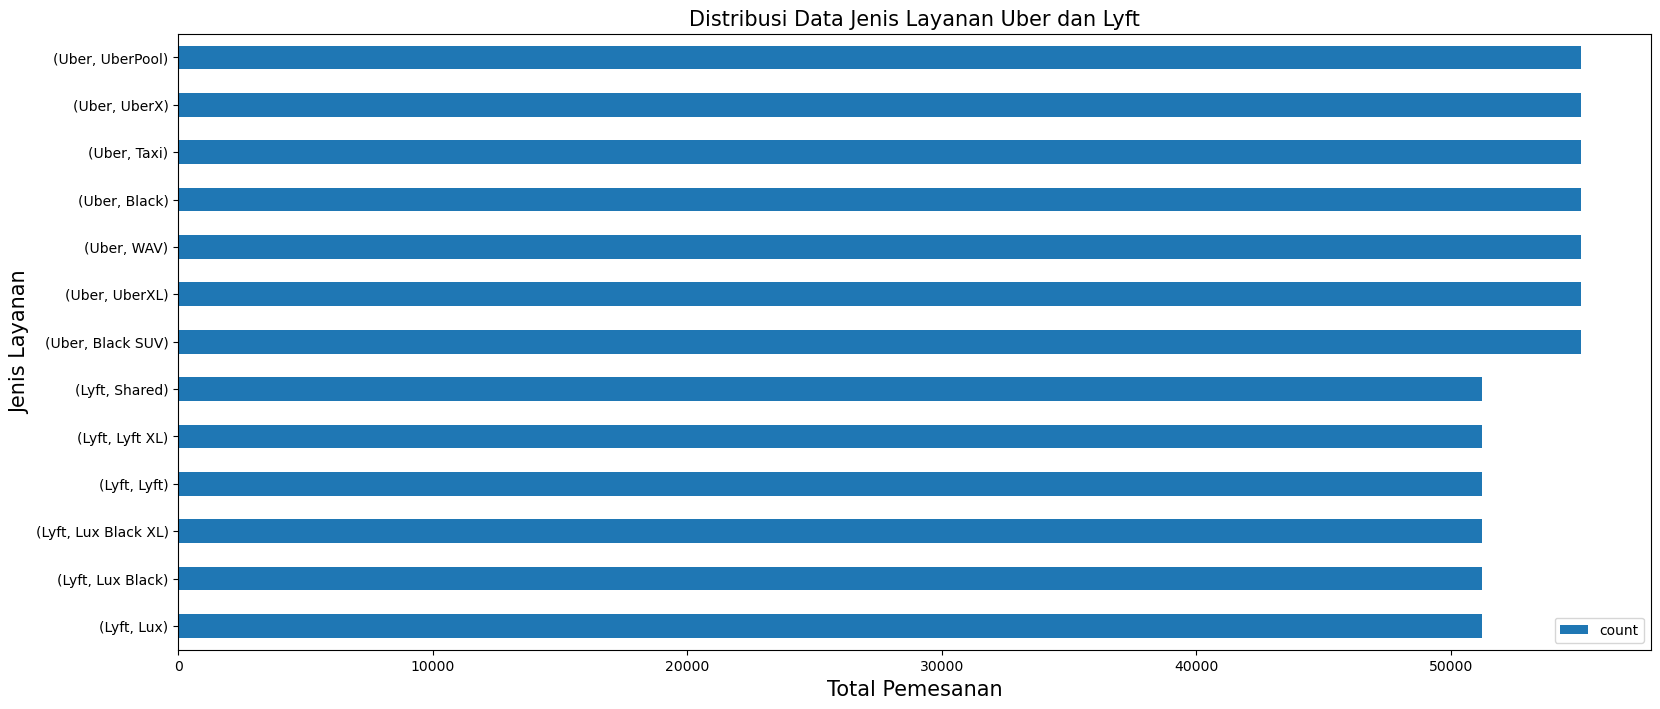

In [19]:
# Visualisasi
df_lyft_num.plot(kind="barh", figsize=(19,8))

plt.title("Distribusi Data Jenis Layanan Uber dan Lyft", fontsize=15)
plt.ylabel("Jenis Layanan", fontsize=15)
plt.xlabel("Total Pemesanan", fontsize=15)

Text(0, 0.5, 'Frekuensi')

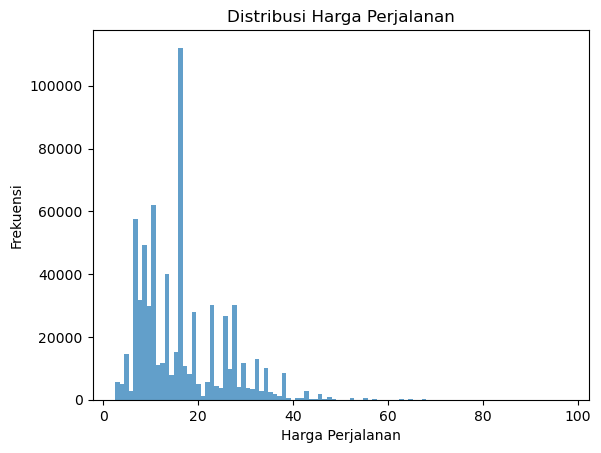

In [20]:
# Membuat Histrogram Distribusi Harga Perjalanan
plt.hist(analysis_df["price"], bins=100, alpha=0.7, label="Harga Perjalanan")
plt.title("Distribusi Harga Perjalanan")
plt.xlabel("Harga Perjalanan")
plt.ylabel("Frekuensi")

Kesimpulan yang dapat diambil dari Histogram di atas adalah:
1. Distribusi jarak perjalanan Uber dan Lyft di Boston didistribusikan secara tidak merata, dengan sebagian besar perjalanan berada dalam jarak 10 hingga 20 kilometer.
2. Terdapat perjalanan yang sangat jauh, yaitu di atas 50 kilometer.

<function matplotlib.pyplot.show(close=None, block=None)>

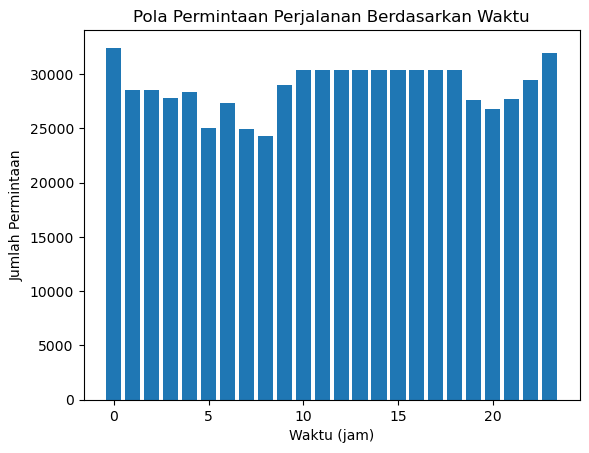

In [21]:
# Membuat Visualisasi Pola Permintaan Perjalananan Berdasarkan Waktu
request_by_hour = analysis_df.groupby("hour").size()
plt.bar(request_by_hour.index, request_by_hour.values)
plt.title("Pola Permintaan Perjalanan Berdasarkan Waktu")
plt.xlabel("Waktu (jam)")
plt.ylabel("Jumlah Permintaan")
plt.show

Kesimpulan yang dapat diambil dari grafik Pola Permintaan Perjalanan Berdasarkan Waktu, yaitu:
1. Permintaan perjalanan Uber dan Lyft tertinggi yaitu antara pukul 11 hingga pukul 12 malam. Sedangkan permintaan paling rendah ada di pukul 12 malam hingga pukul 8 pagi.
2. Permintaan dari pukul 10 pagi hingga pukul 16 berlangsung stabil.

In [22]:
transport_name = analysis_df.groupby("cab_type").size()
transport_name

cab_type
Lyft    307408
Uber    385663
dtype: int64

Text(0.5, 1.0, 'Transportasi Online yang Paling Banyak dipesan')

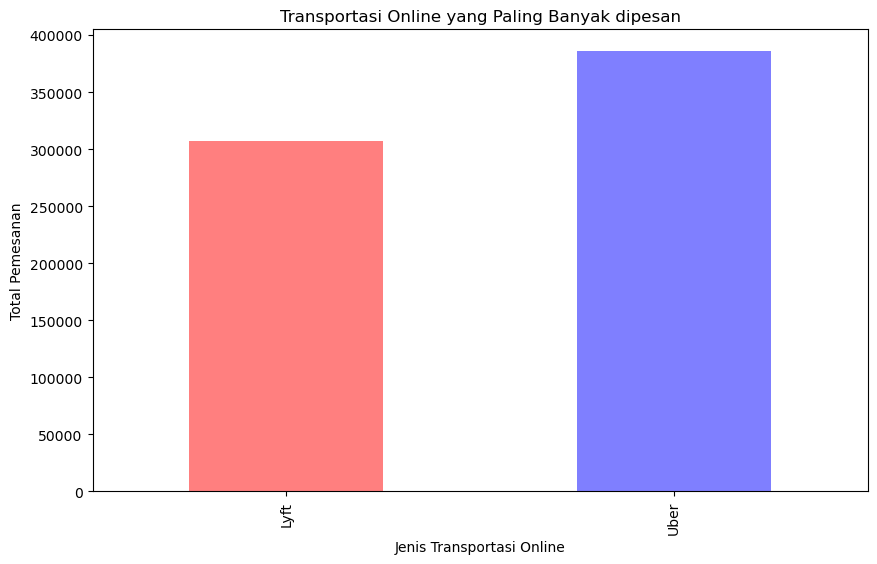

In [23]:
# Plot Trasnsport Name
transport_name.plot(kind='bar', figsize=(10,6), color=['red', 'blue'], alpha=0.5)
plt.xlabel('Jenis Transportasi Online')
plt.ylabel('Total Pemesanan')
plt.title('Transportasi Online yang Paling Banyak dipesan')

Dari grafik di atas dapat disimpulkan bahwa Uber adalah transportasi yang paling sering dipesan dibandingkan dengan Lyft. Uber memiliki total penumpang sebanyak 385663 sedangkan Lyft memiliki total penumpang sebanyak 307408.

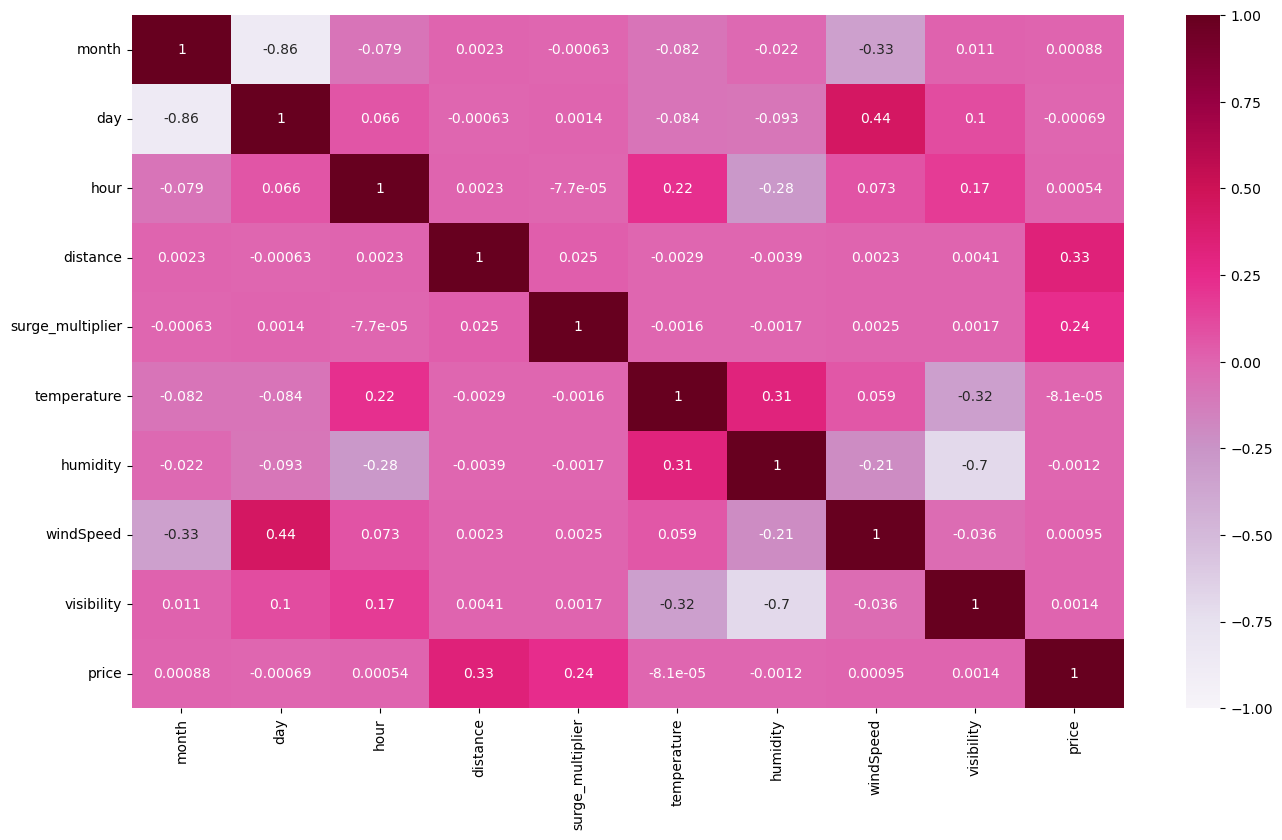

In [24]:
#Melihat korelasi antardata menggunakan heatmap
numerical_df = analysis_df.select_dtypes(include=[np.number])

plt.figure(figsize=(16, 9))
sns.heatmap(numerical_df.corr(), vmin=-1, vmax=1, annot=True, cmap="PuRd")
plt.show()


## Data Preprocessing

Menghitung Central Tendency dan Informasi Lainnya

In [25]:
price = df['price']
print("Mean : ", price.mean())
print("Median : ", price.median())
print("Mode : ", price.mode())
price.describe()

Mean :  16.545125490614062
Median :  16.0
Mode :  0    16.545125
Name: price, dtype: float64


count    693071.000000
mean         16.545125
std           8.946069
min           2.500000
25%           9.500000
50%          16.000000
75%          22.500000
max          97.500000
Name: price, dtype: float64

Grouping and query

In [26]:
destination_prices = df.groupby('destination')['price'].sum()
destination_prices.head()

destination
Back Bay              9.381601e+05
Beacon Hill           9.340574e+05
Boston University     1.083164e+06
Fenway                1.040731e+06
Financial District    1.055048e+06
Name: price, dtype: float64

Buat plot berdasarkan destinasi dan price grouping.

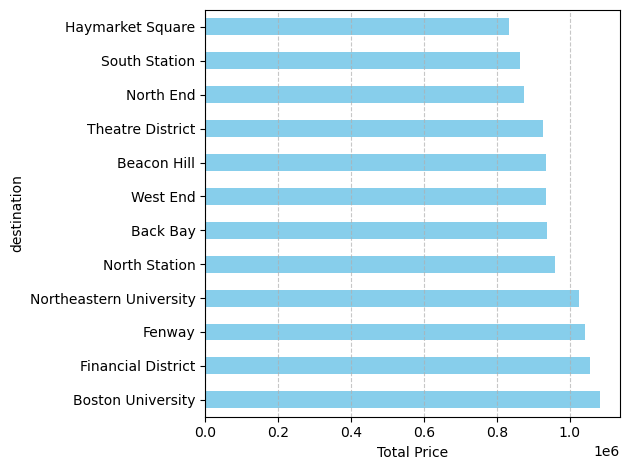

In [27]:
destination_prices = destination_prices.sort_values(ascending=False)
plt.figure()
destination_prices.plot(kind='barh', color='skyblue')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xlabel('Total Price')
plt.tight_layout()
plt.show()

Menghapus Outliers

In [28]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

IQR = Q3 - Q1


lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers_lower = df['price'] > lower_limit
outliers_upper = df['price'] < upper_limit

df = df[outliers_lower & outliers_upper]

Plot linear regression dengan 500 data teratas.

C:\Users\firda\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


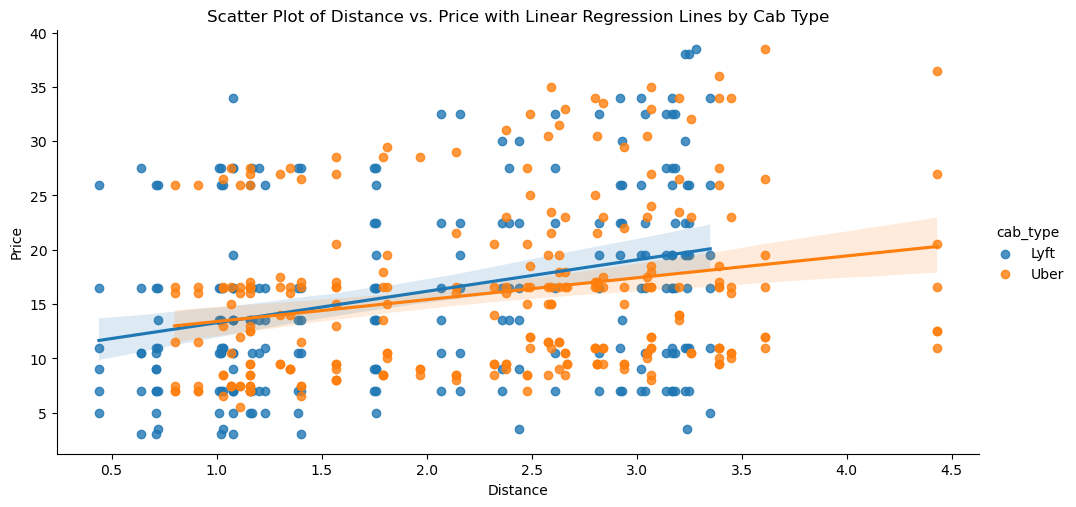

In [34]:
sns.lmplot(data=df.head(500), x='distance', y='price', hue='cab_type', aspect=2)

plt.title('Scatter Plot of Distance vs. Price with Linear Regression Lines by Cab Type')
plt.xlabel('Distance')
plt.ylabel('Price')

plt.show()

Mempersiapkan test train split

In [35]:
y = df['price']
x = df[["distance", "surge_multiplier", "distance"]]

In [41]:
import sklearn.model_selection
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2, random_state=42)

# Modelling

In [42]:
# Import class LinearRegression class dari scikit-learn
from sklearn.linear_model import LinearRegression

# Buat Model Linear Regression
LR = LinearRegression().fit(x_train, y_train)

In [43]:
# Gunakan model yang telah di-train pada langkah sebelumnya
y_prediction = LR.predict(x_test)

In [44]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


score = r2_score(y_test, y_prediction)
print('r2 score is', score)

# Hitung mean squared error (MSE)
mse = mean_squared_error(y_test, y_prediction)
print('mean_squared_error is', mse)

# Hitung root mean squared error (RMSE)
rmse = np.sqrt(mse)
print('root_mean_squared_error is', rmse)


r2 score is 0.10024049424657933
mean_squared_error is 61.24384529533322
root_mean_squared_error is 7.825844701713242


In [48]:
import statsmodels.api as sm

# Definisi variabel X2
X2 = sm.add_constant(x)

# Buat model OLS
est = sm.OLS(y, X2)

# Fit model
est2 = est.fit()

# Print summary
print(est2.summary())
 


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                 2.508e+04
Date:                Sat, 28 Oct 2023   Prob (F-statistic):               0.00
Time:                        19:34:39   Log-Likelihood:            -2.3829e+06
No. Observations:              684866   AIC:                         4.766e+06
Df Residuals:                  684862   BIC:                         4.766e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -2.2876      0.126  

Text(0.5, 1.0, 'Check for Residual normality & mean: \n Residual error')

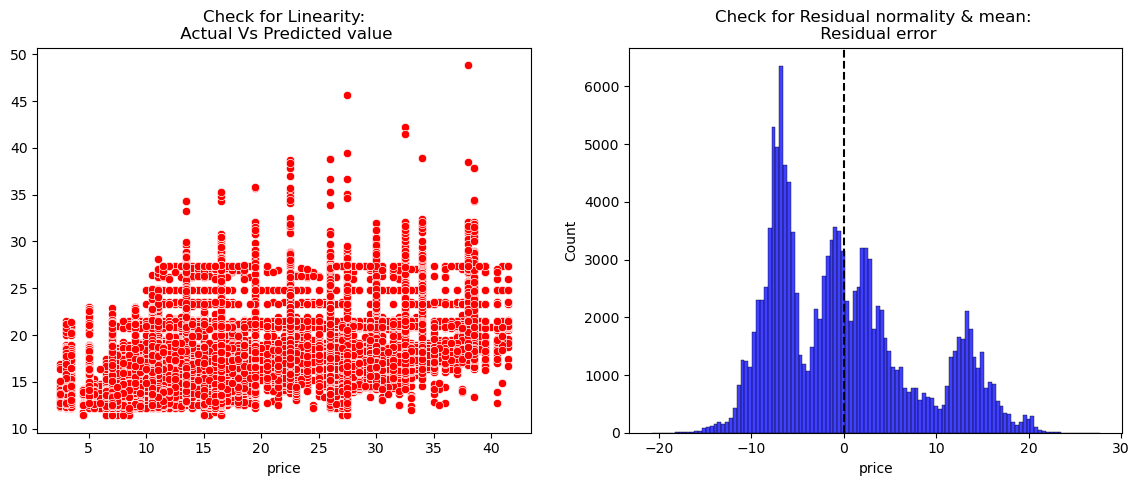

In [50]:
# Uji Linearitas
f = plt.figure(figsize=(14, 5))
ax = f.add_subplot(121)
sns.scatterplot(x=y_test, y=y_prediction, ax=ax, color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Uji Normalitas dan Rata-rata Residu
ax = f.add_subplot(122)
sns.histplot((y_test - y_prediction), ax=ax, color='b')
ax.axvline((y_test - y_prediction).mean(), color='k', linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual error')


# Analysis

Kesimpulan yang dapat diambil dari analisis data pada dataset rideshare_kaggle.csv yang telah diproses:
1. Permintaan Layanan ride-hailing di Boston mengalami fluktuasi berdasarkan waktu dan hari. Dimana permintaan tertinggi terjadi pada hari kerja pada sore hari, yaitu pada pukul 17.00 hingga 20.00. Permintaan terendah terjadi pada hari libur pada pagi hari, yaitu pada pukul 04.00 hingga 06.00.
2. Uber memiliki pangsa pasar yang lebih besar daripada Lyft di Boston. Hal ini ditunjukkan oleh jumlah permintaan Uber yang lebih tinggi daripada Lyft pada sebagian besar waktu dan hari.
3. Waktu tunggu rata-rata untuk mendapatkan taksi Uber lebih rendah daripada waktu tunggu rata-rata untuk mendapatkan taksi Lyft. Hal ini menunjukkan bahwa Uber memiliki armada yang lebih besar atau bahwa Uber lebih efisien dalam memproses permintaan perjalanan.
4. Harga rata-rata untuk perjalanan Uber lebih tinggi daripada harga rata-rata untuk perjalanan Lyft. Hal ini menunjukkan bahwa Uber memposisikan dirinya sebagai layanan ride-hailing premium.
5. Jarak rata-rata perjalanan Uber dan Lyft relatif sama. Hal ini menunjukkan bahwa kedua layanan ride-hailing digunakan untuk perjalanan jarak pendek dan menengah.
6. Permintaan layanan ride-hailing lebih tinggi di kawasan pusat kota Boston daripada di kawasan pinggiran kota. Hal ini menunjukkan bahwa layanan ride-hailing lebih banyak digunakan untuk perjalanan ke dan dari kawasan pusat kota.

Nilai R-squared sekitar 10.2%. berarti bahwa model regresi linear ini dapat menjelaskan 10.02% dari variasi harga layanan ride-hailing. Nilai MSE model regresi linear ini adalah 61.24, yang berarti bahwa kesalahan rata-rata model regresi linear ini adalah 61.24. Nilai RMSE Anda adalah 7.82, yang berarti bahwa akar kuadrat dari kesalahan rata-rata model regresi linear ini adalah 7.82.

Secara keseluruhan, nilai R-squared, MSE, dan RMSE pada model ini menunjukkan bahwa model regresi linear ini memiliki kemampuan yang moderat.